In [ ]:
#DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP
#GRIP@The Sparks Foundation

In [1]:
#NAME- JANIKA PALADUGU
#TASK 3 - Exploratory Data Analysis - RETAIL
# TO FIND: WEAK AREAS TO MAKE MORE PROFIT

In [3]:
#Lets begin by importing the necessary libraries and tools


In [4]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import savefig

In [6]:
#we can now read the data set SampleSuperstore 
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [7]:
#Lets look at the first 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
#Lets look at the bottom 5 rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
#lets find the number of rows and columns of the data set we're dealing with
print(df.shape[0])   #rows
print(df.shape[1])   #columns

9994
13


In [11]:
#lets try and find null values
df.isnull().sum(axis=0)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
#no null values found

In [13]:
#we can now go ahead and drop duplicate rows and columns using the following command
df.drop_duplicates

<bound method DataFrame.drop_duplicates of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Po

In [21]:
#we can use the describe command go get a summary of the date we're dealing with
df[['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']].describe()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [22]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


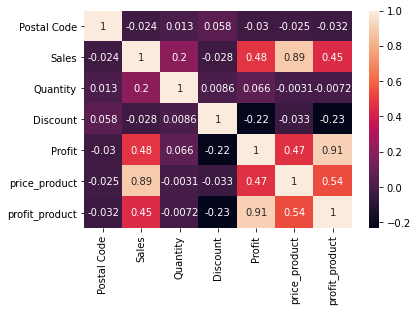

In [55]:
df2 = sns.heatmap(df.corr(), annot= True)
plt.savefig('heatmap.png')

In [26]:
#we can therefore drop postal code
df.drop(columns= 'Postal Code')


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [28]:
#central tendencies- finding the mean, media,min and max state wise
#mean
df_state = df.groupby(['State'])[['Sales','Quantity','Discount','Profit']].mean()
df_state

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,319.846557,4.196721,0.000000,94.865989
Arizona,157.508933,3.848214,0.303571,-15.303235
Arkansas,194.635500,4.000000,0.000000,66.811452
California,228.729451,3.831584,0.072764,38.171608
Colorado,176.418231,3.807692,0.316484,-35.867351
Connecticut,163.223866,3.426829,0.007317,42.823071
Delaware,285.948635,3.822917,0.006250,103.930988
District of Columbia,286.502000,4.000000,0.000000,105.958930
Florida,233.612815,3.600522,0.299347,-8.875461


In [29]:
#median
df_state = df.groupby(['State'])[['Sales','Quantity','Discount','Profit']].median()
df_state

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,70.980,3.0,0.0,16.87500
Arizona,61.512,3.0,0.2,2.53365
Arkansas,54.420,4.0,0.0,18.34080
California,61.020,3.0,0.0,13.30560
Colorado,51.016,3.0,0.2,3.12480
Connecticut,50.000,3.0,0.0,12.18310
Delaware,67.005,3.0,0.0,19.19700
District of Columbia,35.800,3.0,0.0,14.52720
Florida,41.472,3.0,0.2,2.93400


In [30]:
df_state = df.groupby(['State'])[['Sales','Quantity','Discount','Profit']].max()
df_state

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,3040.000,14,0.0,1459.2000
Arizona,1879.960,14,0.7,211.4955
Arkansas,1793.980,9,0.0,843.1706
California,8187.650,14,0.2,1906.4850
Colorado,2549.985,13,0.7,247.9960
Connecticut,1133.350,11,0.3,294.6710
Delaware,10499.970,9,0.3,5039.9856
District of Columbia,1379.920,8,0.0,648.5624
Florida,22638.480,13,0.7,327.5922


In [31]:
#minimum
df_state = df.groupby(['State'])[['Sales','Quantity','Discount','Profit']].min()
df_state

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,3.620,1,0.0,0.0000
Arizona,1.408,1,0.2,-814.4832
Arkansas,4.300,1,0.0,1.4190
California,0.990,1,0.0,-325.5720
Colorado,1.080,1,0.2,-3399.9800
Connecticut,3.520,1,0.0,-15.5826
Delaware,3.380,1,0.0,-48.7839
District of Columbia,9.640,2,0.0,4.4344
Florida,1.167,1,0.2,-1811.0784


In [32]:
#sales and profit per state
state_df = df.groupby(['State'])[['Sales','Profit','State']].sum()
state_df

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457687.6315,76381.3871
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


In [33]:
state_df['Sales'].describe()

count        49.000000
mean      46881.650210
std       80776.294534
min         919.910000
25%        7464.930000
50%       22205.150000
75%       49095.840000
max      457687.631500
Name: Sales, dtype: float64

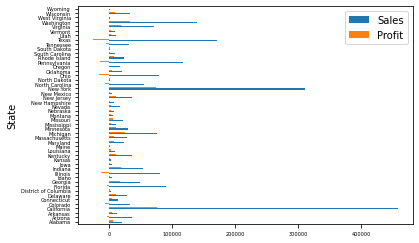

In [36]:
fig1 = state_df.plot(kind='barh', fontsize=5)
plt.savefig('fig1.png')

In [37]:
#thus we can deduce that the highest sales are in CALIFORNIA followed by New york and highest profits from CALIFORNIA followed by New york and then Washington

In [42]:
#we can now go on to looking at the prices per category
df['price_product'] = df.Sales/df.Quantity
df['profit_product'] = df.Profit/df.Quantity

In [44]:
df_category = df.groupby(['Category'])[['Sales','Quantity','Discount','Profit']].describe()
df_category
#max sales and profits from Oficce Supplies

Sales                                                   \
                  count        mean          std    min     25%      50%   
Category                                                                   
Furniture        2121.0  349.834887   503.179145  1.892  47.040  182.220   
Office Supplies  6026.0  119.324101   382.182228  0.444  11.760   27.418   
Technology       1847.0  452.709276  1108.655848  0.990  68.016  166.160   

                                    Quantity            ... Discount       \
                     75%        max    count      mean  ...      75%  max   
Category                                                ...                 
Furniture        435.168   4416.174   2121.0  3.785007  ...      0.3  0.7   
Office Supplies   79.920   9892.740   6026.0  3.801195  ...      0.2  0.8   
Technology       448.534  22638.480   1847.0  3.756903  ...      0.2  0.7   

                 Profit                                                       \
                  count       mean         std        min       25%      50%   
Category                                                                       
Furniture        2121.0   8.699327  136.049246 -1862.3124 -12.84900   7.7748   
Office Supplies  6026.0  20.327050  164.887280 -3701.8928   2.10150   6.8824   
Technology       1847.0  78.752002  428.816633 -6599.9780   5.20365  25.0182   

                                    
                     75%       max  
Category                            
Furniture        33.7266  1013.127  
Office Supplies  19.4163  4946.370  
Technology       74.8946  8399.976  

[3 rows x 32 columns]

In [49]:
df_category1 = df.groupby(['Category'])[['Sales','Profit']].sum()
df_category1

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


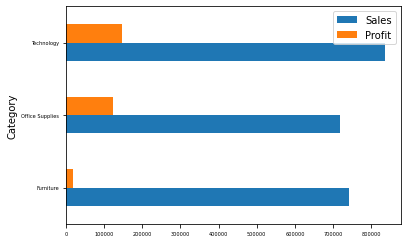

In [51]:
fig2 = df_category1.plot(kind='barh', fontsize=5)
plt.savefig('fig2.png') 


In [52]:
# we can see that sales to profits ratio is lowest in furniture and highest in technology. Thus this is one 
#of the weak areas that the company can strenghten.


In [ ]:
#FINAL ANALYSIS
#IT CAN BE OBSERVED THAT PEOPLE ARE MORE LIKELY TO BUY PRODUCTS ON A DISCOUNTED PRICE.
#THUS PROVIDING DISCOUNTS MAY SEEM LIKE A NOT PROFITABLE OPTION IN THE SHORT RUN, BUT INDUCING SUCH LOSSES IS BENEFECTIAL 
#IN GAINING PROFITS IN THE LONG RUN THROUGH MORE LOYAL CUSTOMERS.
#THANK YOU.